# Exercise 5: Descision trees and linear regression

## 5.1 Decision trees

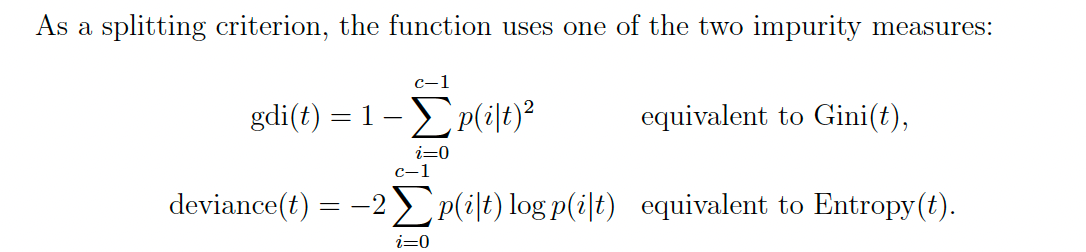

Vertebrate dataset

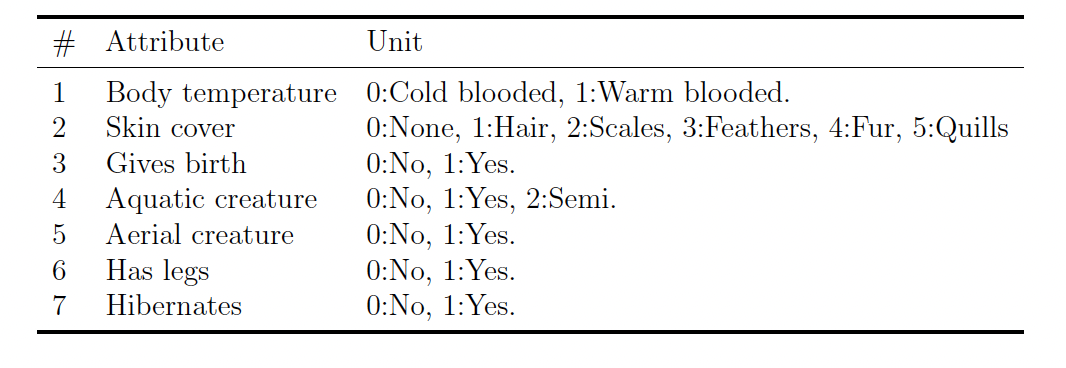

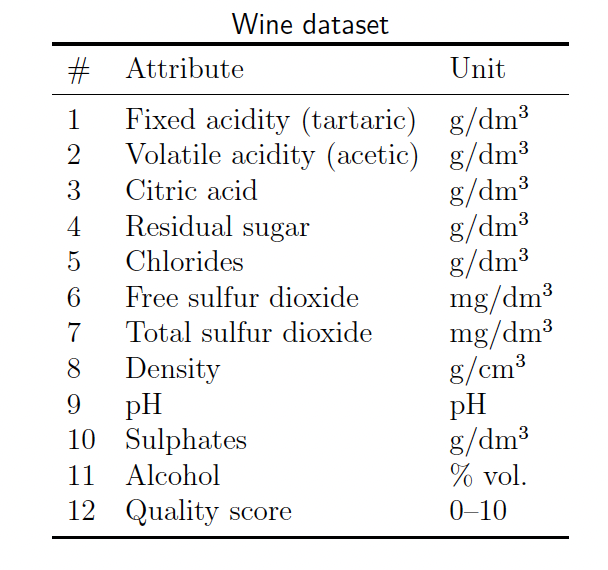

### Task 5.1.1: Examine and Run `ex5_1_1.py`

The script `ex5_1_1.py` contains the vertebrates data. We will examine the dataset to understand the features and how the data is loaded. This helps in becoming familiar with the structure of the data we will use in the decision tree exercises.

In [ ]:
# exercise 5.1.1

import numpy as np

# Names of data objects
dataobjectNames = [
    "Human",
    "Python",
    "Salmon",
    "Whale",
    "Frog",
    "Komodo dragon",
    "Bat",
    "Pigeon",
    "Cat",
    "Leopard shark",
    "Turtle",
    "Penguin",
    "Porcupine",
    "Eel",
    "Salamander",
]

# Attribute names
attributeNames = [
    "Body temperature",
    "Skin cover",
    "Gives birth",
    "Aquatic creature",
    "Aerial creature",
    "Has legs",
    "Hibernates",
]

# Attribute values
X = np.asarray(
    np.mat(
        """
    1 1 1 0 0 1 0;
    0 2 0 0 0 0 1;
    0 2 0 1 0 0 0;
    1 1 1 1 0 0 0;
    0 0 0 2 0 1 1;
    0 2 0 0 0 1 0;
    1 1 1 0 1 1 1;
    1 3 0 0 1 1 0;
    1 4 1 0 0 1 0;
    0 2 1 1 0 0 0;
    0 2 0 2 0 1 0;
    1 3 0 2 0 1 0;
    1 5 1 0 0 1 1;
    0 2 0 1 0 0 0;
    0 0 0 2 0 1 1 """
    )
)

# Class indices
y = np.asarray(np.mat("3 4 2 3 0 4 3 1 3 2 4 1 3 2 0").T).squeeze()

# Class names
classNames = ["Amphibian", "Bird", "Fish", "Mammal", "Reptile"]

# Number data objects, attributes, and classes
N, M = X.shape
C = len(classNames)

print("Ran Exercise 5.1.1")

### Task 5.1.2: Fit a Decision Tree to the Vertebrates Data

We will run the script `ex5_1_2.py` to fit a decision tree to the vertebrates data using the Gini impurity as the splitting criterion. The tree will stop growing when nodes are pure, meaning that all data points in a node belong to the same class. The objective is to understand how the decision tree is structured with the given dataset and explore the impact of different splitting criteria.

We will also compare our resulting tree to the provided example and analyze how the attributes contribute to the splits.

In [ ]:
# exercise 5.1.2
from os import getcwd
from platform import system

import matplotlib.pyplot as plt
import numpy as np

# requires data from exercise 5.1.1
from matplotlib.image import imread
from sklearn import tree

# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = dtc.fit(X, y)

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your setup you may need to decrease or increase the figsize and DPI setting
# to get a readable plot. Hint: Try to maximize the figure after it displays.
fname = "tree_ex512_" + criterion + ".png"

fig = plt.figure(figsize=(8, 8), dpi=100)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
plt.savefig(fname)
plt.show()

print("Ran Exercise 5.1.2")

- **Parameters**:
  - `criterion="gini"`: Specifies the Gini impurity measure for splitting nodes.
  - `min_samples_split=2`: Nodes will continue splitting until they contain less than 2 samples.

### Task 5.1.3: Fit a Decision Tree Using Entropy Criterion

We will run the script `ex5_1_3.py` to fit a decision tree to the vertebrates data using Entropy as the splitting criterion. This allows us to compare the effect of using Entropy (deviance) versus Gini for splitting nodes and observe any differences in the structure of the tree.

- **Parameter**:
  - `criterion="entropy"`: Specifies that we want to use the Entropy impurity measure for splitting nodes.

After running the script, we will compare the resulting tree to the tree built using Gini from Task 5.1.2 and analyze how the choice of splitting criterion affects the decision boundaries.

In [ ]:
# exercise 5.1.3
import os
from os import getcwd
from platform import system

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import imread
from sklearn import tree

# import graphviz
# import pydotplus


# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "entropy"
# dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=1.0 / N)
dtc = dtc.fit(X, y)

# convert the tree into a png file using the Graphviz toolset
fname = "tree_ex513_" + criterion + ".png"

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your setup you may need to decrease or increase the figsize and DPI setting
# to get a useful plot. Hint: Try to maximize the figure after it displays.
fig = plt.figure(figsize=(8, 8), dpi=100)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
plt.savefig(fname)
plt.show()

print("Ran Exercise 5.1.3")


### Task 5.1.4: Classify a New Data Object

We will use the decision tree model trained in previous tasks to classify a new data object representing a "dragon" with the following attributes:
- Cold-blooded
- Has scales
- Gives birth
- Semi-aquatic
- Aerial creature
- Has legs
- Hibernates

The `predict()` method of the decision tree will be used to determine the classification of the dragon. We expect the model to classify the dragon as a reptile based on the given attributes.

In [ ]:
# exercise 5.1.4
# requires Tree model from exercise 5.1.2

# Define a new data object (a dragon) with the attributes given in the text
x = np.array([0, 2, 1, 2, 1, 1, 1]).reshape(1, -1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print("\nNew object attributes:")
print(dict(zip(attributeNames, x[0])))
print("\nClassification result:")
print(classNames[x_class])

print("Ran Exercise 5.1.4")

### Task 5.1.5: Load the Wine Dataset and Remove Outliers

We will load the wine dataset using the script `ex5_1_5.py`. The dataset includes continuous attributes related to wine properties. The script performs the following operations:

- Removes outliers based on the conditions:
  - Volatile acidity > 20 g/dm³
  - Density > 10 g/cm³
  - Alcohol > 200%
- Removes the `Quality score` attribute to focus only on the quantitative measurements for prediction.

After processing, we will end up with a clean dataset to use in subsequent tasks.

In [ ]:
# exercise 5.1.5
import os

import importlib_resources
import numpy as np
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
# Load Matlab data file and extract variables of interest
workingDir = os.getcwd()
print("Running from: " + workingDir)

mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].astype(int).squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
classNames = [j[0] for i in mat_data["classNames"] for j in i]


# Remove outliers
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:, 0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print("Ran Exercise 5.1.5")

In [23]:
def run_5_1_5():
    # exercise 5.1.5
    import os

    import importlib_resources
    import numpy as np
    from scipy.io import loadmat

    filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
    # Load Matlab data file and extract variables of interest
    workingDir = os.getcwd()
    print("Running from: " + workingDir)

    mat_data = loadmat(filename)
    X = mat_data["X"]
    y = mat_data["y"].astype(int).squeeze()
    C = mat_data["C"][0, 0]
    M = mat_data["M"][0, 0]
    N = mat_data["N"][0, 0]

    attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
    classNames = [j[0] for i in mat_data["classNames"] for j in i]


    # Remove outliers
    outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
    valid_mask = np.logical_not(outlier_mask)
    X = X[valid_mask, :]
    y = y[valid_mask]
    # Remove attribute 12 (Quality score)
    X = X[:, 0:11]
    attributeNames = attributeNames[0:11]
    # Update N and M
    N, M = X.shape

    return X, y, N, M

    print("Ran Exercise 5.1.5")


### Task 5.1.6: Fit a Decision Tree to the Wine Dataset

In this task, we use the decision tree model to classify wine as either red or white. We fit the decision tree to the wine dataset processed in task 5.1.5 using the Gini impurity measure as the splitting criterion.

- **Parameters**:
  - `criterion="gini"`: Specifies the Gini impurity measure for splitting nodes.
  - `min_samples_split=100`: Nodes will only split if they contain at least 100 samples, which helps control overfitting by limiting the growth of the tree.

We will observe the changes in the decision tree structure when modifying `min_samples_split` and analyze the impact of reducing this parameter on the model's complexity and overfitting.

In [ ]:
# exercise 5.1.6
from os import getcwd
from platform import system

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import imread
from sklearn import tree

# Fit classification tree using, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=100)
dtc = dtc.fit(X, y)

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your screen resolution and setup you may need to decrease or increase
# the figsize and DPI setting to get a useful plot.
# Hint: Try to open the generated png file in an external image editor as it can be easier
# to inspect outside matplotlib's figure environment.
fname = "tree_ex516_" + criterion + "_wine_data.png"
fig = plt.figure(figsize=(20, 20), dpi=300)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
plt.savefig(fname)
plt.close()

fig = plt.figure()
plt.imshow(imread(fname))
plt.axis("off")
plt.box("off")
plt.show()

print("Ran Exercise 5.1.6")


### Task 5.1.7: Classify a Wine with Given Attributes

We will use the decision tree model trained in exercise 5.1.6 to classify a new wine sample with the given attribute values. The attribute values are based on the wine properties, such as acidity, density, and alcohol content.

We use the `predict()` method to determine if the wine is classified as red or white. We will also verify the classification probability to determine the confidence of the model in its prediction.

In [ ]:
# exercise 5.1.7
# requires Tree model from exercise 5.1.5

# Define a new data object (new type of wine) with the attributes given in the text
x = np.array([6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.44, 12]).reshape(1, -1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print("\nNew object attributes:")
for i in range(len(attributeNames)):
    print("{0}: {1}".format(attributeNames[i], x[0][i]))
print("\nClassification result:")
print(classNames[x_class])

print("Ran Exercise 5.1.7")

## 5.2 Linear and logistic regression

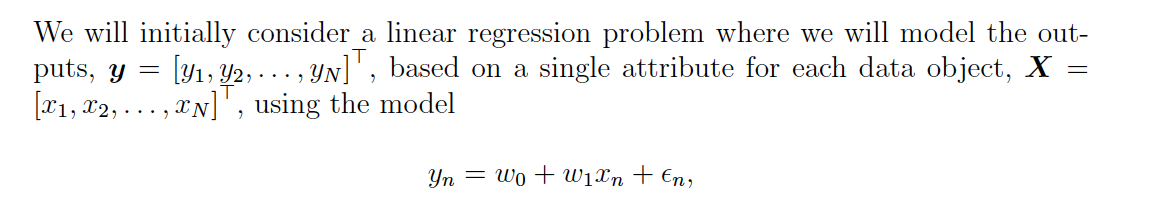

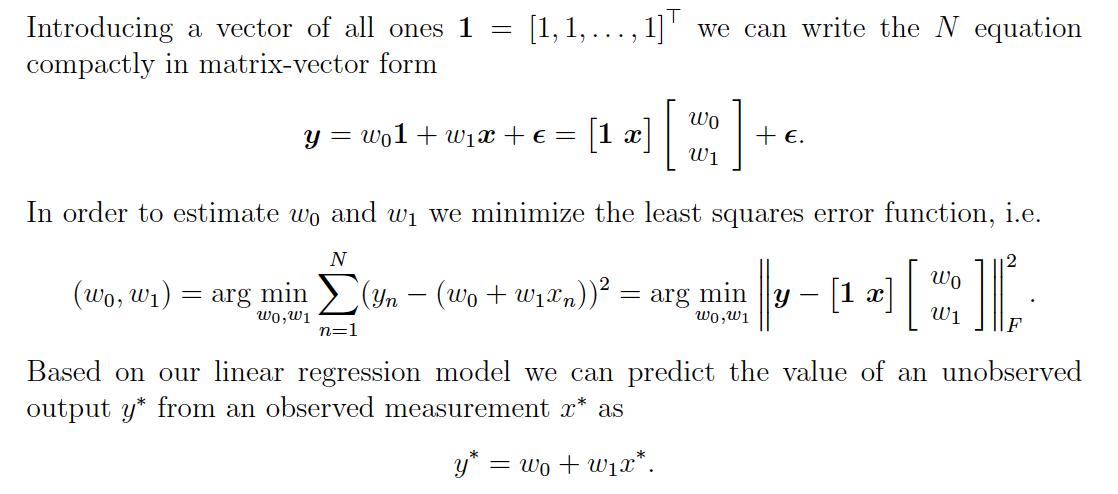

### Task 5.2.1: Generate Data for Linear Regression

In this task, we generate synthetic data for a linear regression model using the following equation:

\[
y_n = w_0 + w_1 x_n + \epsilon_n
\]

where the noise \( \epsilon_n \) is drawn from a normal distribution with mean 0 and standard deviation 0.1. The parameters used are:

- \( w_0 = -0.5 \)
- \( w_1 = 0.01 \)

We generate 100 data points and create a scatter plot to visualize the relationship between the attribute values and the output \( y \).


In [ ]:
# exercise 5.2.1

import numpy as np
from matplotlib.pyplot import figure, plot, show, title, xlabel, ylabel

# Number of data objects
N = 100

# Attribute values
X = np.array(range(N))

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std * np.random.randn(N) + eps_mean)

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1 * X + eps

# Make a scatter plot
figure()
plot(X, y, "o")
xlabel("X")
ylabel("y")
title("Illustration of a linear relation with noise")

show()

print("Ran Exercise 5.2.1")

### Task 5.2.2: Estimate Model Parameters for Linear Regression

In this task, we estimate the parameters of the linear regression model using the data generated in Task 5.2.1. We use the `sklearn.linear_model.LinearRegression` class to estimate the parameters \( w_0 \) and \( w_1 \).

- **Parameter Estimation**: The model is fit using the `fit()` method, which calculates the optimal values for \( w_0 \) and \( w_1 \).
- **Comparison**: We compare the estimated parameters with the original parameters used to generate the data.
- **Visualization**: The predictions of the fitted model, as well as the predictions using the original parameters, are plotted along with the scatter plot of the data points to evaluate how well the model fits.

This task will help us understand the effectiveness of linear regression in estimating the underlying data-generating process.

In [ ]:
# exercise 5.2.2

import numpy as np
import sklearn.linear_model as lm
from matplotlib.pyplot import figure, legend, plot, show, xlabel, ylabel

# Use dataset as in the previous exercise
N = 100
X = np.array(range(N)).reshape(-1, 1)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std * np.random.randn(N) + eps_mean).reshape(-1, 1)
w0 = -0.5
w1 = 0.01
y = w0 + w1 * X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
# y_est = model.intercept_ + X @ model.coef_


# Plot original data and the model output
f = figure()

plot(X, y, ".")
plot(X, y_true, "-")
plot(X, y_est, "-")
xlabel("X")
ylabel("y")
legend(["Training data", "Data generator", "Regression fit (model)"])

show()

print("Ran Exercise 5.2.2")

#### Interpretation of the Linear Regression Fit

The plot shows the relationship between the generated data and the fitted model:

- **Training Data (blue dots)**: The generated data points with noise, simulating real-world variability.
- **Data Generator (orange line)**: The true underlying relationship used to generate the data without noise.
- **Regression Fit (green line)**: The fitted linear regression model closely follows the true relationship, indicating that the model has effectively captured the underlying trend despite the noise.

Overall, the linear regression model provides an accurate estimate of the true data-generating process, with only minor discrepancies due to noise in the training data.

### Task 5.2.3: Fit a Higher-Order Polynomial Regression Model

In this task, we fit a polynomial regression model to data generated using a linear regression model that includes a squared term (\(x^2\)). By including higher-order terms (e.g., squared, cubed), we aim to observe how these additional terms affect the model's ability to capture complex relationships in the data.

- **Higher-Order Terms**: The model includes transformations of the original attribute, such as \(x^2\) or \(x^3\).
- **Objective**: To compare the polynomial model's fit to the data and observe how well it captures the underlying trend, compared to a simple linear regression.

We will visualize the fit to evaluate the model's accuracy and see if including more complex terms improves the prediction or leads to overfitting.

In [ ]:
# exercise 5.2.3

import numpy as np
import sklearn.linear_model as lm
from matplotlib.pyplot import figure, legend, plot, show, xlabel, ylabel, ylim

# Parameters
Kd = 5  # no of terms for data generator
Km = 3 # no of terms for regression model
N = 50  # no of data objects to train a model
Xe = np.linspace(-2, 2, 1000).reshape(
    -1, 1
)  # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5  # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2, 2, N).reshape(-1, 1)
Xd = np.power(X, range(1, Kd + 1))
eps = eps_std * np.random.randn(N) + eps_mean
w = -np.power(-0.9, range(1, Kd + 2))
y = w[0] + Xd @ w[1:] + eps


# True data generator (assuming no noise)
Xde = np.power(Xe, range(1, Kd + 1))
y_true = w[0] + Xde @ w[1:]


# Fit ordinary least squares regression model
Xm = np.power(X, range(1, Km + 1))
model = lm.LinearRegression()
model = model.fit(Xm, y)

# Predict values
Xme = np.power(Xe, range(1, Km + 1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = figure()
plot(X, y, ".")
plot(Xe, y_true, "-")
plot(Xe, y_est, "-")
xlabel("X")
ylabel("y")
ylim(-2, 8)
legend(
    [
        "Training data",
        "Data generator K={0}".format(Kd),
        "Regression fit (model) K={0}".format(Km),
    ]
)

show()

print("Ran Exercise 5.2.3")

### Task 5.2.4: Fit a Linear Regression Model to Predict Alcohol Content

In this task, we load the wine dataset and fit a linear regression model to predict the alcohol content based on the other quantitative attributes (excluding `Quality score`). 

- **Objective**: The goal is to evaluate the effectiveness of a linear regression model in predicting the alcohol content of wine.
- **Visualization**: We create a scatter plot to compare the true values of the alcohol content with the predicted values. This helps us determine if the predictions are accurate and if the model shows any bias.

By analyzing the scatter plot, we will assess the accuracy of the predictions and identify if the alcohol content can be predicted with a reasonable margin of error.

In [ ]:
# exercise 5.2.4
import sklearn.linear_model as lm

# requires wine data from exercise 5.1.5

# exercise 5.1.5
import os

import importlib_resources
import numpy as np
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
# Load Matlab data file and extract variables of interest
workingDir = os.getcwd()
print("Running from: " + workingDir)

mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].astype(int).squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
classNames = [j[0] for i in mat_data["classNames"] for j in i]


# Remove outliers
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:, 0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print("Ran Exercise 5.1.5")


####

from matplotlib.pylab import figure, hist, plot, show, subplot, xlabel, ylabel

# Split dataset into features and target vector
alcohol_idx = attributeNames.index("Alcohol")
y = X[:, alcohol_idx]

X_cols = list(range(0, alcohol_idx)) + list(range(alcohol_idx + 1, len(attributeNames)))
X = X[:, X_cols]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X, y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est - y

# Display scatter plot
figure()
subplot(2, 1, 1)
plot(y, y_est, ".")
xlabel("Alcohol content (true)")
ylabel("Alcohol content (estimated)")
subplot(2, 1, 2)
hist(residual, 40)

show()

print("Ran Exercise 5.2.4")

### Task 5.2.6: Fit a Logistic Regression Model to Predict Wine Type

In this task, we use logistic regression to predict whether a wine is red or white based on its quantitative attributes (excluding `Quality score`). We will use the `LogisticRegression` class from `sklearn`.

- **Objective**: The logistic regression model will classify wines as either red or white and provide the probabilities for each class.
- **Prediction for a Specific Wine**: We will use the model to predict if the wine defined in Task 5.1.7 is classified as white, and determine if the probability of being classified as white is greater than 90%.

This task helps in understanding how logistic regression works for binary classification and how well the attributes predict wine type.

- **Visualizations**:
  - **Scatter Plot**: Compare the true alcohol content with the estimated values to assess the model's performance.
  - **Residual Histogram**: Display the residuals to understand the distribution of errors.

In [ ]:
# exercise 5.2.6
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
X, y, N, M = run_5_1_5()
from matplotlib.pylab import figure, legend, plot, show, xlabel, ylabel, ylim

# Fit logistic regression model
model = lm.LogisticRegression()
model = model.fit(X, y)

# Classify wine as White/Red (0/1) and assess probabilities
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0]

# Define a new data object (new type of wine), as in exercise 5.1.7
x = np.array([6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.44, 12]).reshape(1, -1)
# Evaluate the probability of x being a white wine (class=0)
x_class = model.predict_proba(x)[0, 0]

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print("\nProbability of given sample being a white wine: {0:.4f}".format(x_class))
print("\nOverall misclassification rate: {0:.3f}".format(misclass_rate))

f = figure()
class0_ids = np.nonzero(y == 0)[0].tolist()
plot(class0_ids, y_est_white_prob[class0_ids], ".y")
class1_ids = np.nonzero(y == 1)[0].tolist()
plot(class1_ids, y_est_white_prob[class1_ids], ".r")
xlabel("Data object (wine sample)")
ylabel("Predicted prob. of class White")
legend(["White", "Red"])
ylim(-0.01, 1.5)

show()

print("Ran Exercise 5.2.6")